<span style="font-size: 10px">Namah Siddham

## <span style = 'color:rgb(180,180,0)'>**Peformance Analysis of FAANG Stocks (Facebook, Apple, Amazon, Netflix and Google) and Benchmark Index S&P 500**

### **1. Import Libraries**

In [388]:
import numpy as np
import pandas as pd
import yfinance as yf  # to download data from yahoo finance
import matplotlib.pyplot as plt
import seaborn as sns

### **2. Download Stocks Data from Yahoo Finance (5 years data - 2018 to 2022)** 

In [389]:
tickers = ['AAPL','META','AMZN','GOOG','NFLX','^GSPC']  # Apple, Facebook, Amazon, Netflix and S&P 500 Index
stocks = yf.download(tickers,start='2018-01-01', end = '2022-12-31',progress=False)
stocks

Adj Close                                                \
                  AAPL       AMZN       GOOG        META        NFLX   
Date                                                                   
2018-01-02   40.831585  59.450500  53.250000  181.419998  201.070007   
2018-01-03   40.824482  60.209999  54.124001  184.669998  205.050003   
2018-01-04   41.014107  60.479500  54.320000  184.330002  205.630005   
2018-01-05   41.481056  61.457001  55.111500  186.850006  209.990005   
2018-01-08   41.326996  62.343498  55.347000  188.279999  212.050003   
...                ...        ...        ...         ...         ...   
2022-12-23  131.477127  85.250000  89.809998  118.040001  294.959991   
2022-12-27  129.652435  83.040001  87.930000  116.879997  284.170013   
2022-12-28  125.674026  81.820000  86.459999  115.620003  276.880005   
2022-12-29  129.233658  84.180000  88.949997  120.260002  291.119995   
2022-12-30  129.552719  84.000000  88.730003  120.339996  294.880005   

                              Close                                    ...  \
                  ^GSPC        AAPL       AMZN       GOOG        META  ...   
Date                                                                   ...   
2018-01-02  2695.810059   43.064999  59.450500  53.250000  181.419998  ...   
2018-01-03  2713.060059   43.057499  60.209999  54.124001  184.669998  ...   
2018-01-04  2723.989990   43.257500  60.479500  54.320000  184.330002  ...   
2018-01-05  2743.149902   43.750000  61.457001  55.111500  186.850006  ...   
2018-01-08  2747.709961   43.587502  62.343498  55.347000  188.279999  ...   
...                 ...         ...        ...        ...         ...  ...   
2022-12-23  3844.820068  131.860001  85.250000  89.809998  118.040001  ...   
2022-12-27  3829.250000  130.029999  83.040001  87.930000  116.879997  ...   
2022-12-28  3783.219971  126.040001  81.820000  86.459999  115.620003  ...   
2022-12-29  3849.280029  129.610001  84.180000  88.949997  120.260002  ...   
2022-12-30  3839.500000  129.929993  84.000000  88.730003  120.339996  ...   

                 Open                                          Volume  \
                 GOOG        META        NFLX        ^GSPC       AAPL   
Date                                                                    
2018-01-02  52.417000  177.679993  196.100006  2683.729980  102223600   
2018-01-03  53.215500  181.880005  202.050003  2697.850098  118071600   
2018-01-04  54.400002  184.899994  206.199997  2719.310059   89738400   
2018-01-05  54.700001  185.589996  207.250000  2731.330078   94640000   
2018-01-08  55.111500  187.199997  210.020004  2742.669922   82271200   
...               ...         ...         ...          ...        ...   
2022-12-23  87.620003  116.029999  296.179993  3815.110107   63814900   
2022-12-27  89.309998  117.930000  293.190002  3843.340088   69007800   
2022-12-28  87.500000  116.250000  281.920013  3829.560059   85438400   
2022-12-29  87.029999  116.400002  283.179993  3805.449951   75703700   
2022-12-30  87.364998  118.160004  285.529999  3829.060059   77034200   

                                                                
                AMZN      GOOG      META      NFLX       ^GSPC  
Date                                                            
2018-01-02  53890000  24752000  18151900  10966900  3397430000  
2018-01-03  62176000  28604000  16886600   8591400  3544030000  
2018-01-04  60442000  20092000  13880900   6029600  3697340000  
2018-01-05  70894000  25582000  13574500   7033200  3239280000  
2018-01-08  85590000  20952000  17994700   5580200  3246160000  
...              ...       ...       ...       ...         ...  
2022-12-23  57433700  17815000  17796600   4251100  2819280000  
2022-12-27  57284000  15470900  21392300   5778100  3030300000  
2022-12-28  58228600  17879600  19612500   5964400  3083520000  
2022-12-29  54995900  18280700  22366200   9588500  3003680000  
2022-12-30  62401200  19190300  19583800   

### **3. Data Preprocessing**

In [390]:
# Renaming S&P 500 Column
stocks.rename(columns={'^GSPC':'SP500'},inplace=True)

In [391]:
# Checking for Missing Values
stocks.isnull().any().any()  

False

<span style = "color:rgb(0,180,180)">There are no missing values present in the dataset.

In [392]:
stocks.dtypes

Adj Close  AAPL     float64
           AMZN     float64
           GOOG     float64
           META     float64
           NFLX     float64
           SP500    float64
Close      AAPL     float64
           AMZN     float64
           GOOG     float64
           META     float64
           NFLX     float64
           SP500    float64
High       AAPL     float64
           AMZN     float64
           GOOG     float64
           META     float64
           NFLX     float64
           SP500    float64
Low        AAPL     float64
           AMZN     float64
           GOOG     float64
           META     float64
           NFLX     float64
           SP500    float64
Open       AAPL     float64
           AMZN     float64
           GOOG     float64
           META     float64
           NFLX     float64
           SP500    float64
Volume     AAPL       int64
           AMZN       int64
           GOOG       int64
           META       int64
           NFLX       int64
           SP500    

### **4. Stocks Trend Analysis**

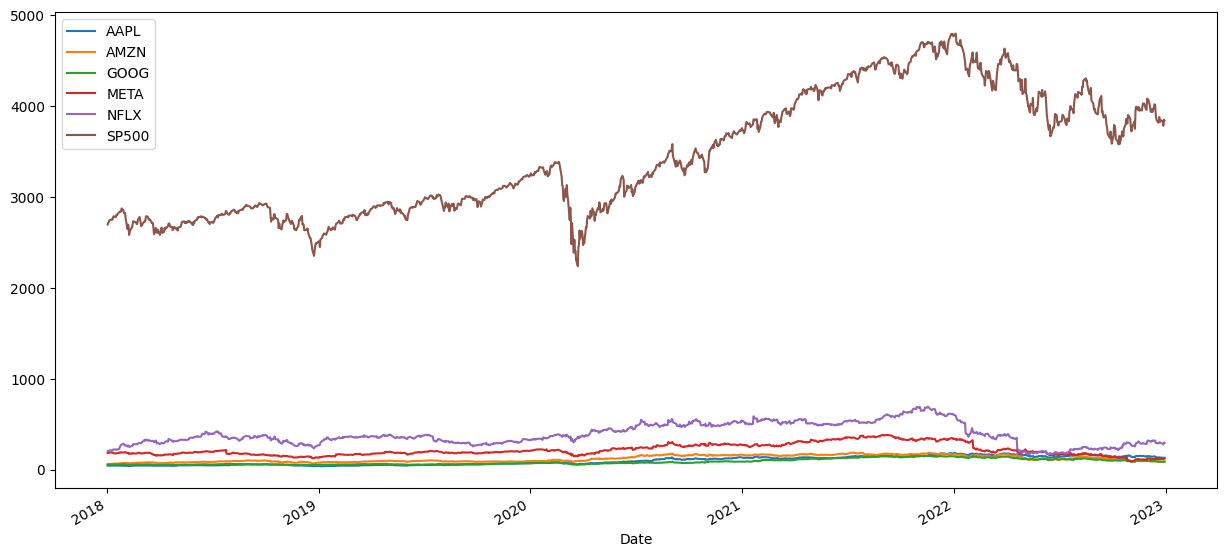

In [393]:
# Plotting Closing Prices of all Symbols
stocks['Close'].plot(figsize=(15,7));

<span style = "color:rgb(0,180,180)">Since the prices are starting at different levels and scales, the comparison is not meaningful. Normalizing the data so that they all start at same level 100.This normalization is achieved by dividing all prices by the first price in the series and then multiplying by 100.

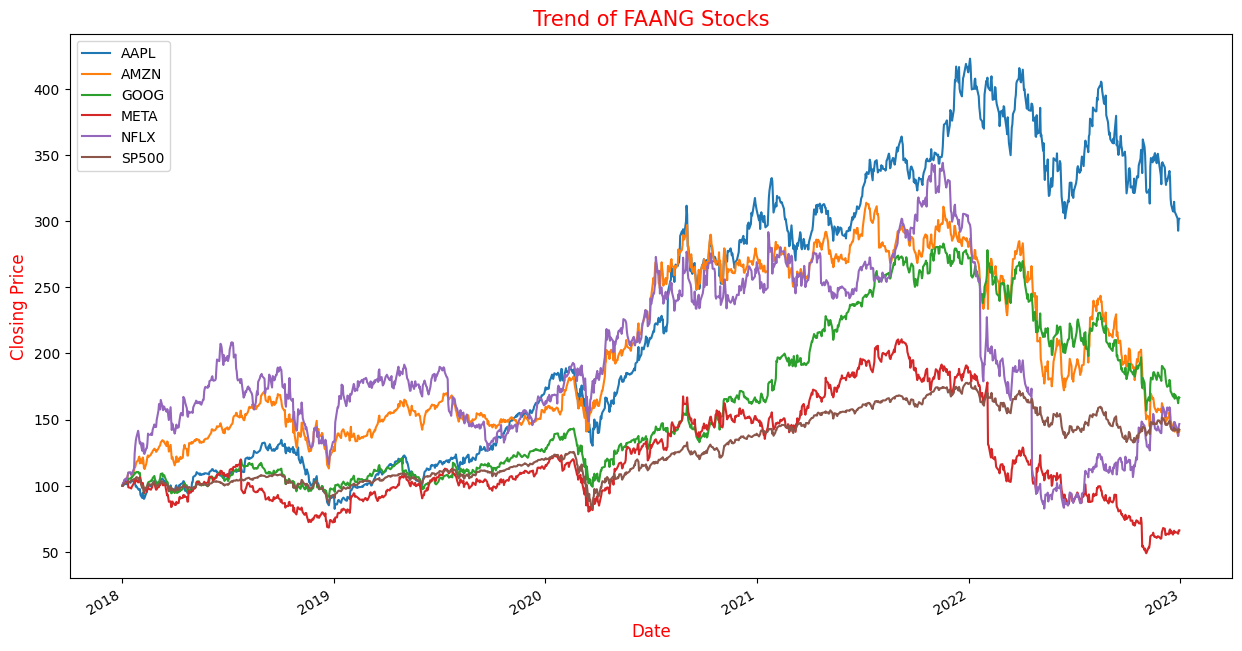

In [394]:
stocks_normalized_close = (stocks['Close']/(stocks['Close'].iloc[0])*100)
stocks_normalized_close.plot(figsize=(15,8))
plt.title('Trend of FAANG Stocks',color='red',fontsize=15)
plt.xlabel('Date',color='red',fontsize=12)
plt.ylabel('Closing Price',color='red',fontsize=12);

<span style = "color:rgb(0,180,180)">As it can be seen above, the best performing stock is Apple and worst performing stocks is Meta in terms of closing prices. However, risk and return both should be taken into consideration which will be explored later in this analysis. 

<span style = "color:rgb(0,180,180)">Facebook stock has performed worse than S&P 500. Netflix and Amazon has performed similar to S&P 500, Google has performed slightly better and apple has performed much better than the Benchmark Index S&P 500. The quantification of returns are in analysis below.

### **5. Returns Analysis**

### Percentage Increase and Decrease of Each Stock Over the Entire Period

In [395]:
# Calculation of Percentage Increase or Decrease of Each Stock over the Entire Period
pct_change = (stocks['Close'].iloc[-1]-stocks['Close'].iloc[0])/stocks['Close'].iloc[0]
pct_change

AAPL     2.017067
AMZN     0.412940
GOOG     0.666291
META    -0.336677
NFLX     0.466554
SP500    0.424247
dtype: float64

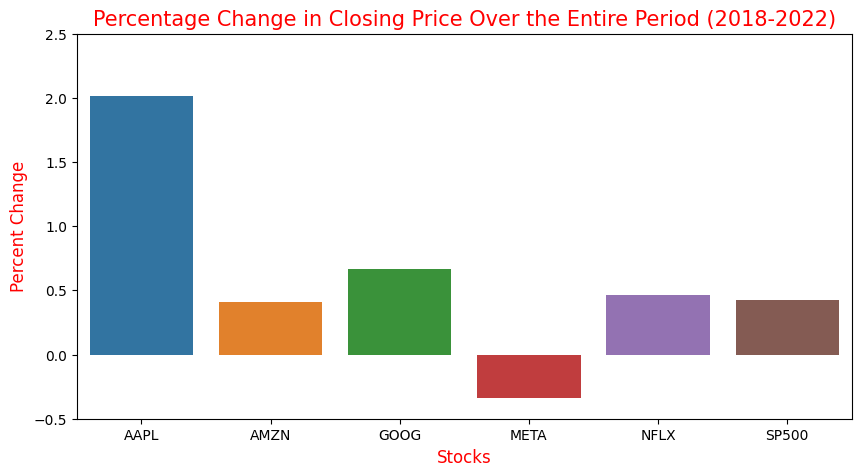

In [396]:
plt.figure(figsize=(10,5))
sns.barplot(x=pct_change.index,y=pct_change)
plt.title('Percentage Change in Closing Price Over the Entire Period (2018-2022)',fontdict={'size':15,'color':'red'})
plt.xlabel('Stocks',fontdict={'size':12,'color':'red'})
plt.ylabel('Percent Change',fontdict={'size':12,'color':'red'})
plt.yticks([-.5,0,.5,1,1.5,2,2.5]);

### Daily % Change for Each Stock

In [397]:
daily_pct_change = stocks['Close'].pct_change(1).dropna()*100
daily_pct_change

,AAPL,AMZN,GOOG,META,NFLX,SP500
Date,,,,,,
2018-01-03,-0.017415,1.277531,1.641316,1.791423,1.979408,0.639882
2018-01-04,0.464497,0.447601,0.362130,-0.184110,0.282859,0.402864
2018-01-05,1.138532,1.616252,1.457106,1.367116,2.120313,0.703377
2018-01-08,-0.371425,1.442468,0.427316,0.765316,0.980998,0.166234
2018-01-09,-0.011474,0.467571,-0.061431,-0.217763,-1.292151,0.130293
...,...,...,...,...,...,...
2022-12-23,-0.279812,1.742450,1.756170,0.785518,-0.937031,0.586810
2022-12-27,-1.387837,-2.592374,-2.093305,-0.982721,-3.658116,-0.404962
2022-12-28,-3.068521,-1.469173,-1.671786,-1.078024,-2.565369,-1.202064


In [398]:
daily_pct_change.describe()

,AAPL,AMZN,GOOG,META,NFLX,SP500
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000
mean,0.110079,0.052908,0.060107,0.005642,0.077276,0.037650
std,2.109987,2.255364,1.975118,2.723280,3.006715,1.377578
min,-12.864696,-14.049438,-11.100818,-26.390095,-35.116603,-11.984055
25%,-0.912346,-1.055082,-0.862785,-1.187676,-1.382480,-0.531146
50%,0.099464,0.122909,0.105091,0.068040,0.043486,0.085159
75%,1.236632,1.172906,1.086355,1.357929,1.572264,0.707039
max,11.980827,13.535902,10.448541,17.593598,16.854344,9.382774


AAPL (Apple) has a standard deviation of 2.109987, meaning that its daily percentage change has a relatively high degree of volatility.

AMZN (Amazon) has a higher standard deviation of 2.255364, suggesting even higher volatility.

GOOG (Google) has a slightly lower standard deviation of 1.975118, suggesting somewhat lower volatility compared to AAPL and AMZN.

META (Facebook) has a standard deviation of 2.723280,

NFLX (Netflix) with a standard deviation of 3.006715, the highest of the individual stocks listed, suggesting it has had the highest volatility.

The S&P 500, an index often used as a proxy for the overall stock market, has a much lower standard deviation of 1.377578, indicating less volatility than any of the individual stocks listed. This makes sense, as an index like the S&P 500 includes many different stocks, which tends to smooth out the overall volatility.

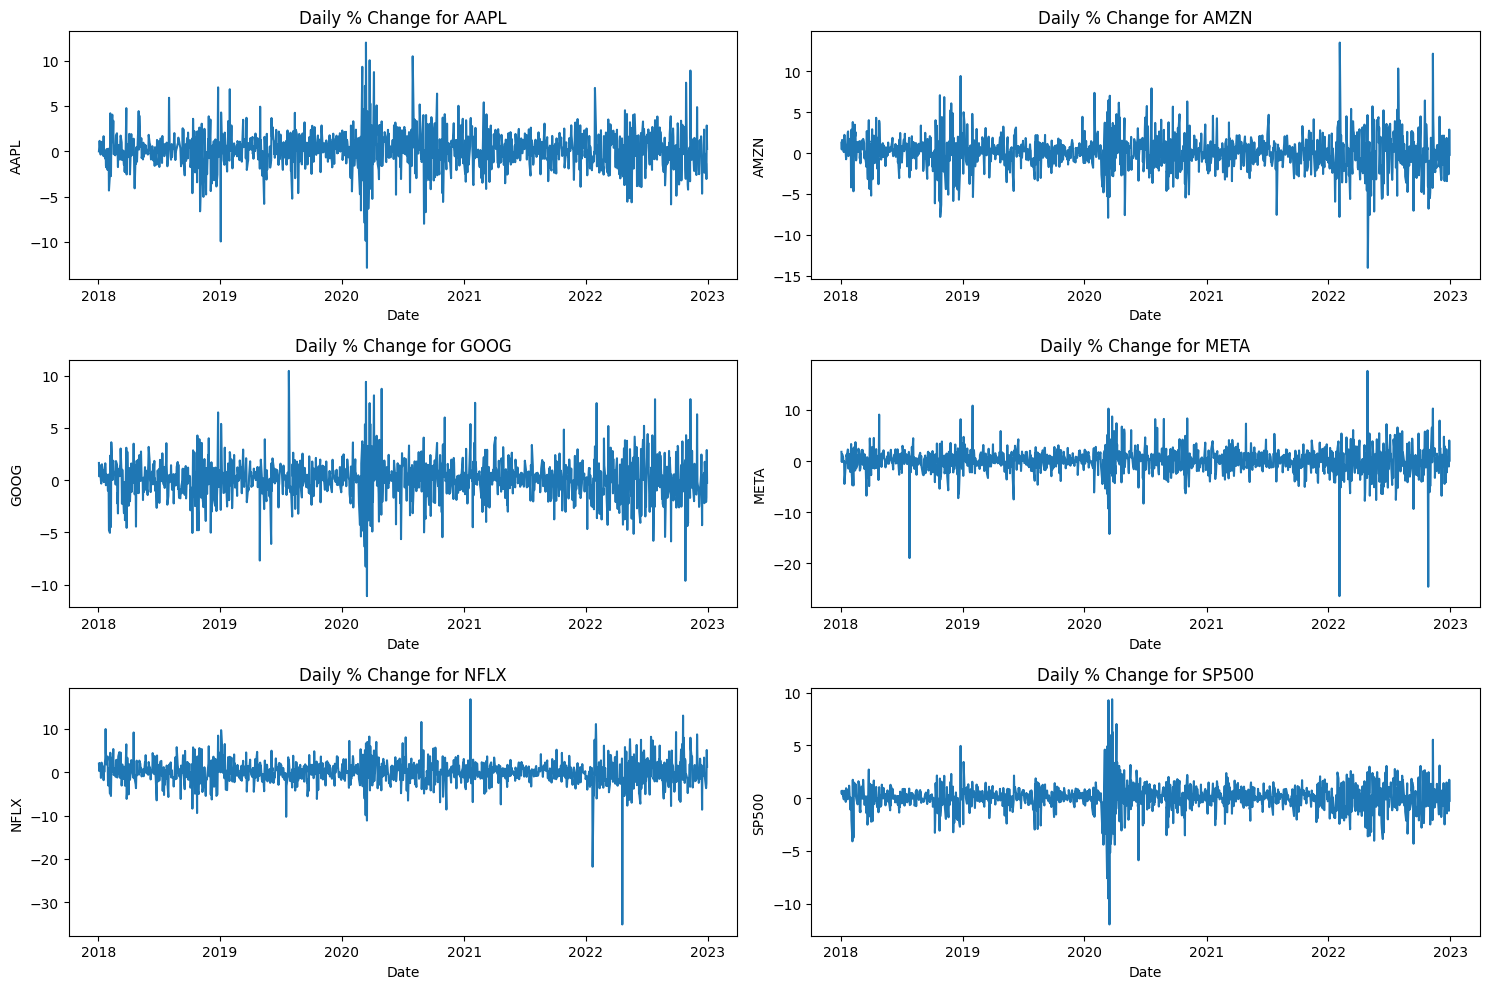

In [399]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

# Flatten the axes
axes = axes.flatten()

# Iterate through axes and columns simultaneously
for ax, col in zip(axes, daily_pct_change.columns):
    sns.lineplot(data=daily_pct_change, x=daily_pct_change.index, y=daily_pct_change[col], ax=ax)
    ax.set_title(f'Daily % Change for {col}')

plt.tight_layout()
plt.show()


In [400]:
stocks_close = stocks['Close']
stocks_close

,AAPL,AMZN,GOOG,META,NFLX,SP500
Date,,,,,,
2018-01-02,43.064999,59.450500,53.250000,181.419998,201.070007,2695.810059
2018-01-03,43.057499,60.209999,54.124001,184.669998,205.050003,2713.060059
2018-01-04,43.257500,60.479500,54.320000,184.330002,205.630005,2723.989990
2018-01-05,43.750000,61.457001,55.111500,186.850006,209.990005,2743.149902
2018-01-08,43.587502,62.343498,55.347000,188.279999,212.050003,2747.709961
...,...,...,...,...,...,...
2022-12-23,131.860001,85.250000,89.809998,118.040001,294.959991,3844.820068
2022-12-27,130.029999,83.040001,87.930000,116.879997,284.170013,3829.250000
2022-12-28,126.040001,81.820000,86.459999,115.620003,276.880005,3783.219971


In [401]:
stocks_close['AAPL_daily_diff'] = stocks_close['AAPL'].diff(1)
stocks_close['AAPL_daily_pct_change'] = stocks_close['AAPL'].pct_change(1)*100
stocks_close['AMZN_daily_diff'] = stocks_close['AMZN'].diff(1)
stocks_close['AMZN_daily_pct_change'] = stocks_close['AMZN'].pct_change(1)*100
stocks_close['GOOG_daily_diff'] = stocks_close['GOOG'].diff(1)
stocks_close['GOOG_daily_pct_change'] = stocks_close['GOOG'].pct_change(1)*100
stocks_close['META_daily_diff'] = stocks_close['META'].diff(1)
stocks_close['META_daily_pct_change'] = stocks_close['META'].pct_change(1)*100
stocks_close['NFLX_daily_diff'] = stocks_close['NFLX'].diff(1)
stocks_close['NFLX_daily_pct_change'] = stocks_close['NFLX'].pct_change(1)*100
stocks_close['SP500_daily_diff'] = stocks_close['SP500'].diff(1)
stocks_close['SP500_daily_pct_change'] = stocks_close['SP500'].pct_change(1)*100

stocks_close

C:\Users\SGangwal\AppData\Local\Temp\ipykernel_19624\4088275909.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\SGangwal\AppData\Local\Temp\ipykernel_19624\4088275909.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\SGangwal\AppData\Local\Temp\ipykernel_19624\4088275909.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

,AAPL,AMZN,GOOG,META,NFLX,SP500,AAPL_daily_diff,AAPL_daily_pct_change,AMZN_daily_diff,AMZN_daily_pct_change,GOOG_daily_diff,GOOG_daily_pct_change,META_daily_diff,META_daily_pct_change,NFLX_daily_diff,NFLX_daily_pct_change,SP500_daily_diff,SP500_daily_pct_change
Date,,,,,,,,,,,,,,,,,,
2018-01-02,43.064999,59.450500,53.250000,181.419998,201.070007,2695.810059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,43.057499,60.209999,54.124001,184.669998,205.050003,2713.060059,-0.007500,-0.017415,0.759499,1.277531,0.874001,1.641316,3.250000,1.791423,3.979996,1.979408,17.250000,0.639882
2018-01-04,43.257500,60.479500,54.320000,184.330002,205.630005,2723.989990,0.200001,0.464497,0.269501,0.447601,0.195999,0.362130,-0.339996,-0.184110,0.580002,0.282859,10.929932,0.402864
2018-01-05,43.750000,61.457001,55.111500,186.850006,209.990005,2743.149902,0.492500,1.138532,0.977501,1.616252,0.791500,1.457106,2.520004,1.367116,4.360001,2.120313,19.159912,0.703377
2018-01-08,43.587502,62.343498,55.347000,188.279999,212.050003,2747.709961,-0.162498,-0.371425,0.886497,1.442468,0.235500,0.427316,1.429993,0.765316,2.059998,0.980998,4.560059,0.166234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,131.860001,85.250000,89.809998,118.040001,294.959991,3844.820068,-0.369995,-0.279812,1.459999,1.742450,1.549995,1.756170,0.919998,0.785518,-2.790009,-0.937031,22.430176,0.586810
2022-12-27,130.029999,83.040001,87.930000,116.879997,284.170013,3829.250000,-1.830002,-1.387837,-2.209999,-2.592374,-1.879997,-2.093305,-1.160004,-0.982721,-10.789978,-3.658116,-15.570068,-0.404962
2022-12-28,126.040001,81.820000,86.459999,115.620003,276.880005,3783.219971,-3.989998,-3.068521,-1.220001,-1.469173,-1.470001,-1.671786,-1.259995,-1.078024,-7.290009,-2.565369,-46.030029,-1.202064


In [402]:
stocks_close[['AAPL','AAPL_daily_pct_change']]

,AAPL,AAPL_daily_pct_change
Date,,
2018-01-02,43.064999,NaN
2018-01-03,43.057499,-0.017415
2018-01-04,43.257500,0.464497
2018-01-05,43.750000,1.138532
2018-01-08,43.587502,-0.371425
...,...,...
2022-12-23,131.860001,-0.279812
2022-12-27,130.029999,-1.387837
2022-12-28,126.040001,-3.068521


In [403]:
# Calulating Monthly Returns
monthly_returns = (stocks['Close'].resample('BM').last().pct_change(1)*100).dropna()
monthly_returns

,AAPL,AMZN,GOOG,META,NFLX,SP500
Date,,,,,,
2018-02-28,6.384760,4.242906,-5.573793,-4.585581,7.798749,-3.894737
2018-03-30,-5.805073,-4.304937,-6.602517,-10.391439,1.362482,-2.688450
2018-04-30,-1.501969,8.207480,-1.401447,7.641284,5.793122,0.271877
2018-05-31,13.076365,4.053941,6.650741,11.499999,12.526408,2.160834
2018-06-29,-0.941828,4.306519,2.825834,1.324439,11.328210,0.484244
2018-07-31,2.798332,4.567601,9.107691,-11.187734,-13.790456,3.602156
2018-08-31,19.622688,13.236448,0.076403,1.825237,8.958358,3.026321
2018-09-28,-0.830294,-0.482431,-2.029240,-6.413241,1.754246,0.429429
2018-10-31,-3.047756,-20.219175,-9.778208,-7.704009,-19.338199,-6.940336


In [404]:
monthly_returns.describe()

,AAPL,AMZN,GOOG,META,NFLX,SP500
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.368123,0.687988,0.980501,-0.093514,0.964857,0.666648
std,9.403850,9.492846,7.412831,11.270267,12.020304,5.400319
min,-18.404459,-23.752509,-17.674969,-32.634236,-49.181771,-12.511928
25%,-5.557639,-5.138504,-4.008135,-6.591872,-5.118801,-2.951314
50%,4.092967,1.358730,1.559755,0.462005,1.754246,1.792426
75%,9.531611,5.955452,6.647733,5.571317,7.415762,3.821748
max,21.437974,27.059597,16.508020,27.156921,28.609825,12.684404


<Axes: xlabel='Date'>

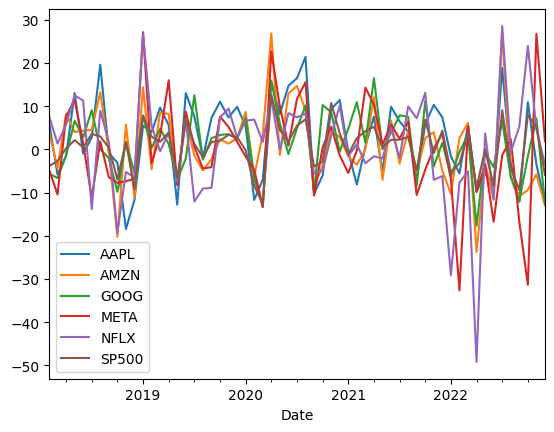

In [405]:
(stocks['Close'].resample('BM').last().pct_change(1)*100).dropna().plot()

In [406]:
import plotly.express as px

df_long=pd.melt(monthly_returns.reset_index(), id_vars='Date', value_vars=monthly_returns.columns)
fig = px.line(df_long, x='Date', y='value', color='variable')

fig.show()


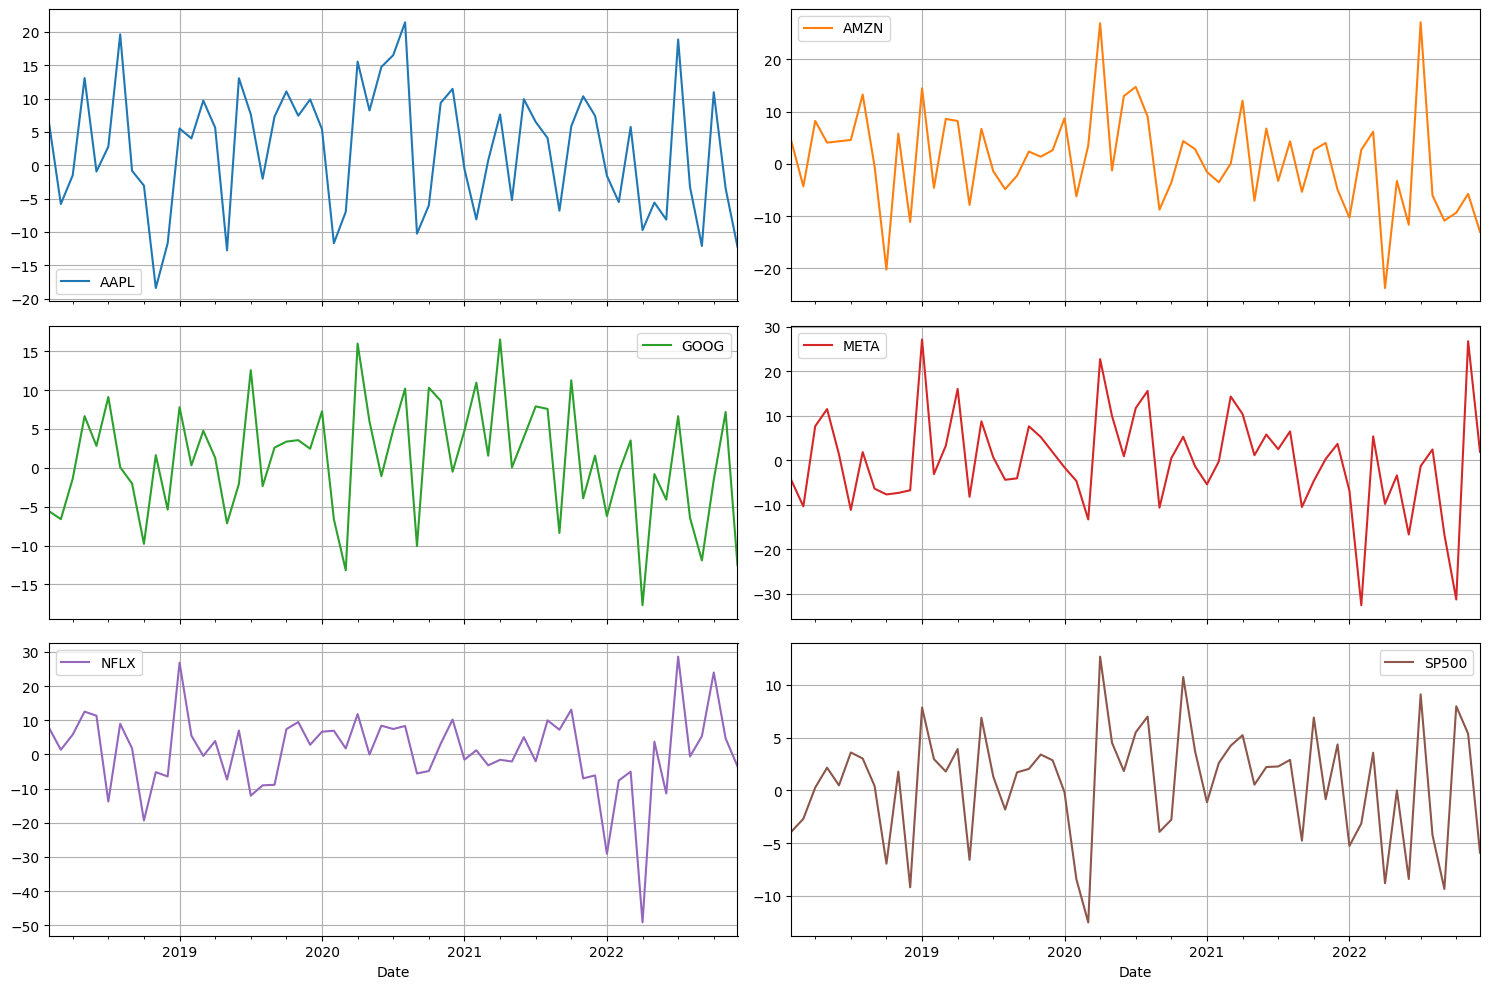

In [407]:
monthly_returns.plot(subplots=True,layout=(3,2),figsize=(15,10),grid=True)
plt.tight_layout()

In this 5 year period, every time except once, when S&P 500 dropped more than 5% in a month, has provided positive return the very next month. The pattern is worth exploring further although the sample size is 5 year period which is relatively small. There is a potential rebound effect when S&P 500 drops more than 5% in a month. 

In [408]:
for col in monthly_returns.columns:
    positive_count = (monthly_returns[col]>5).sum()
    print(f'{col}: {positive_count}')

AAPL: 29
AMZN: 16
GOOG: 17
META: 18
NFLX: 24
SP500: 11


## Distribution of Daily Returns

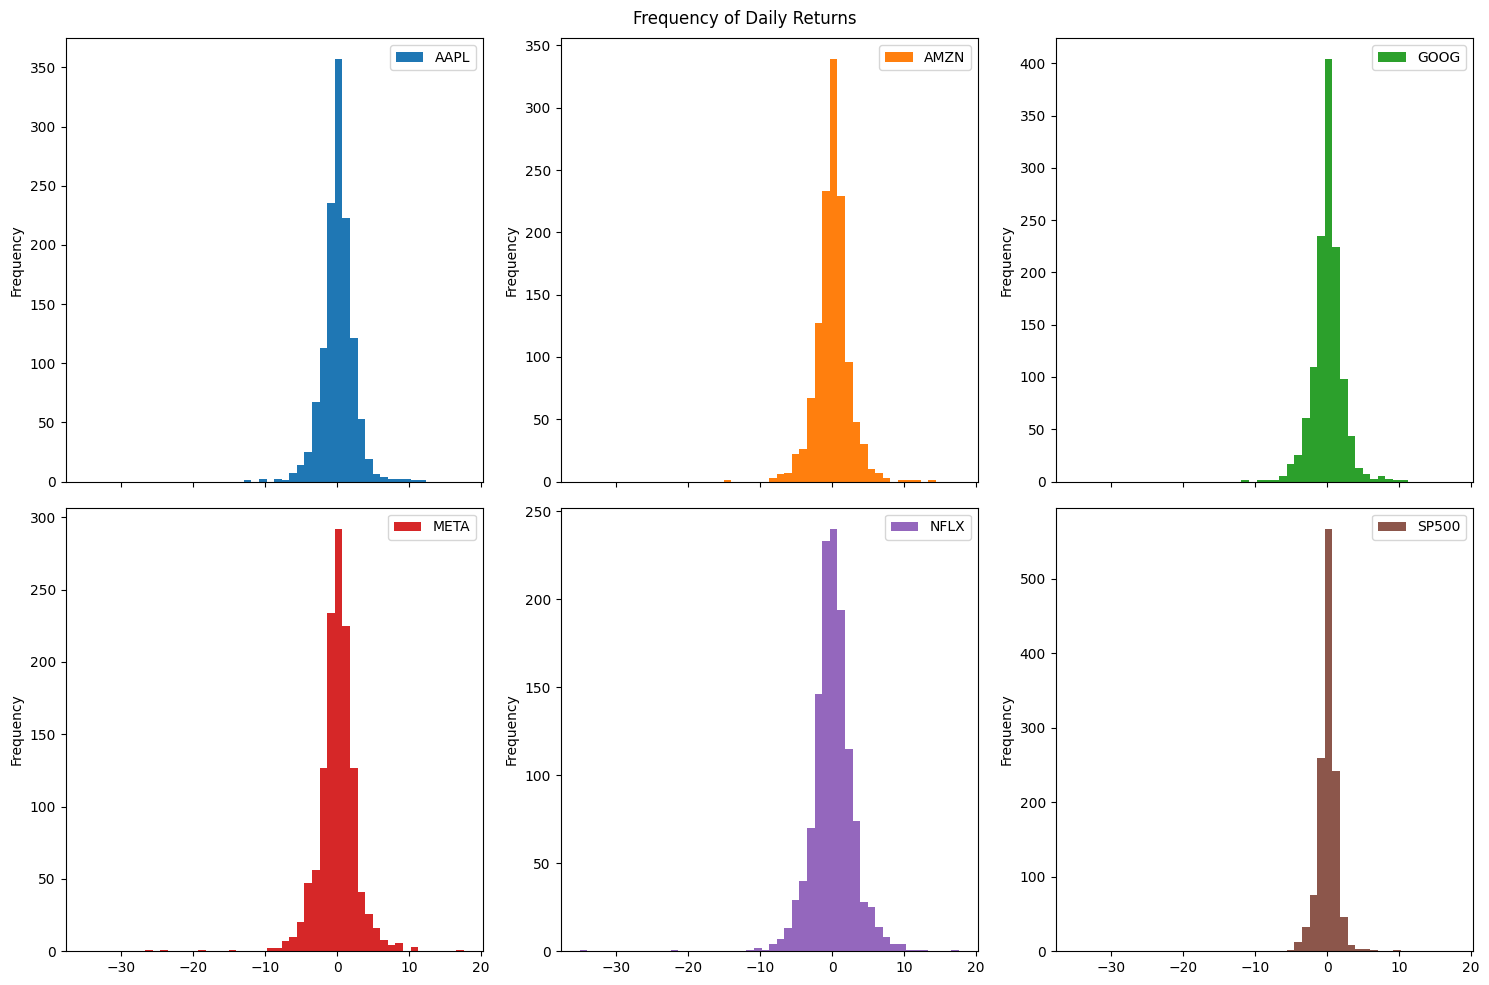

In [409]:
daily_pct_change.plot(kind='hist',subplots=True,layout=(2,3),figsize=(15,10), bins= 50,title='Frequency of Daily Returns')
plt.tight_layout()

NFLX and META stock are more spread out. They tend to provide higher returns in a day although it comes with a risk since the standard deviation is large which represents higher volatility.

### Standard Deviation for Daily Returns

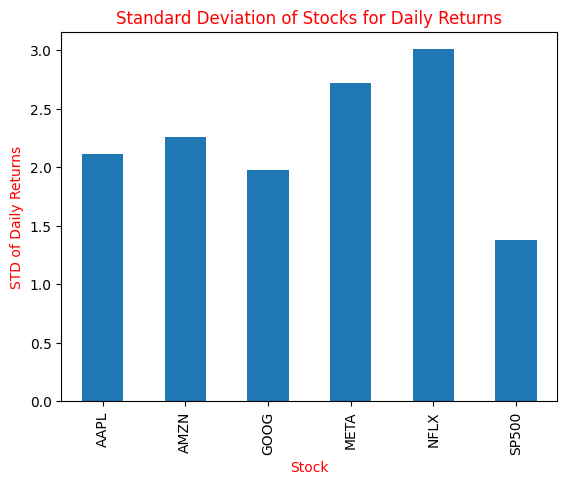

In [410]:
daily_pct_change.std().plot(kind='bar')
plt.title('Standard Deviation of Stocks for Daily Returns',color='red')
plt.xlabel('Stock',color='red')
plt.ylabel('STD of Daily Returns',color='red');

### Distribution of Monthly Returns

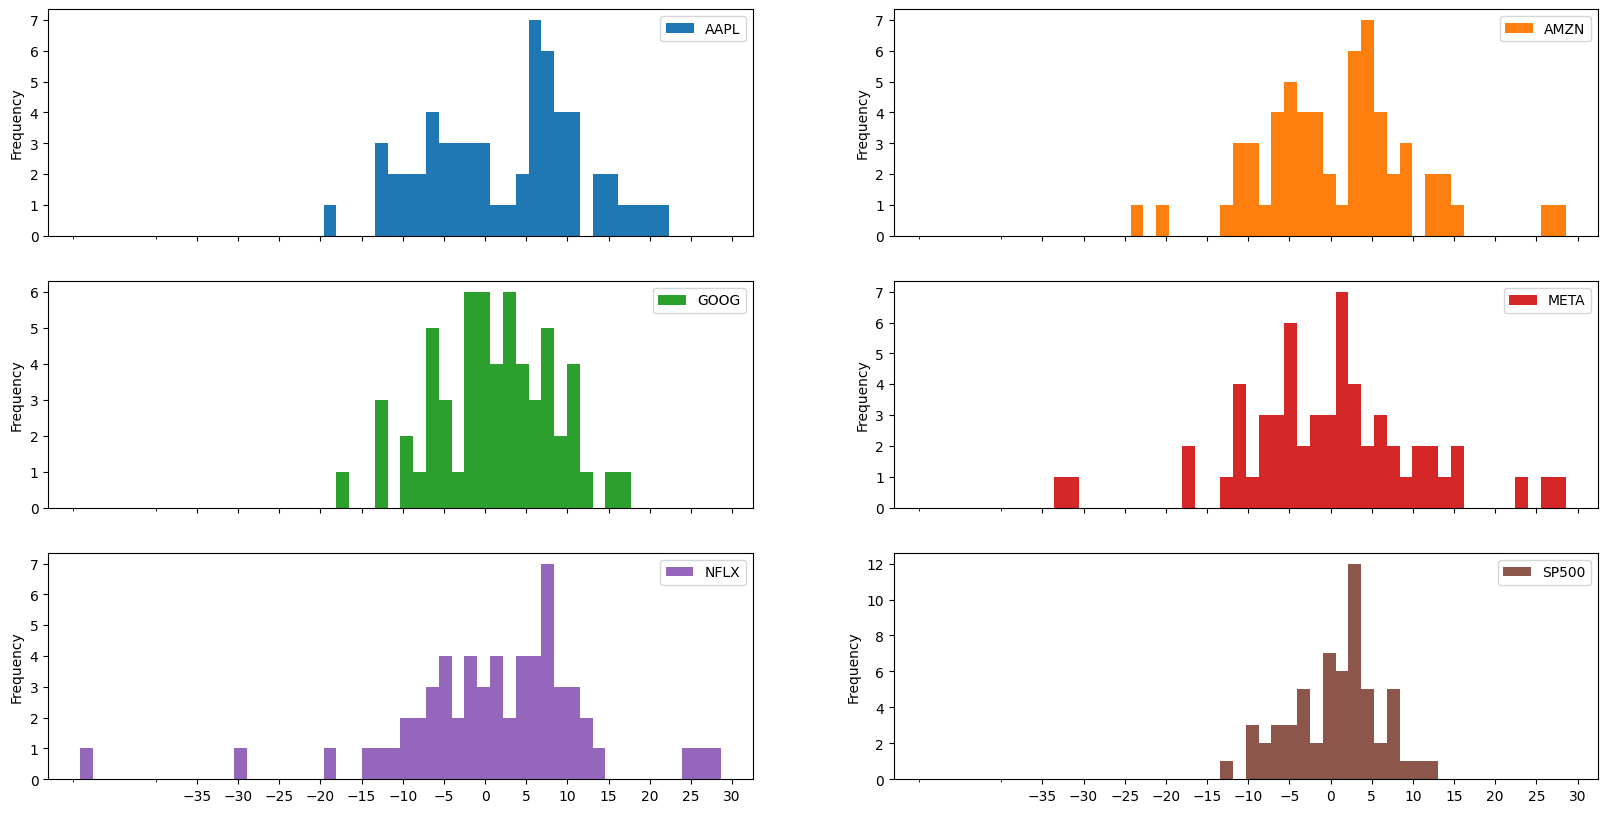

In [411]:
monthly_returns.plot(kind='hist',subplots=True,layout=(3,2),figsize=(20,10), bins= 50)
plt.xticks(np.arange(-35,35,5));

### Standard Deviation of Monthly Returns

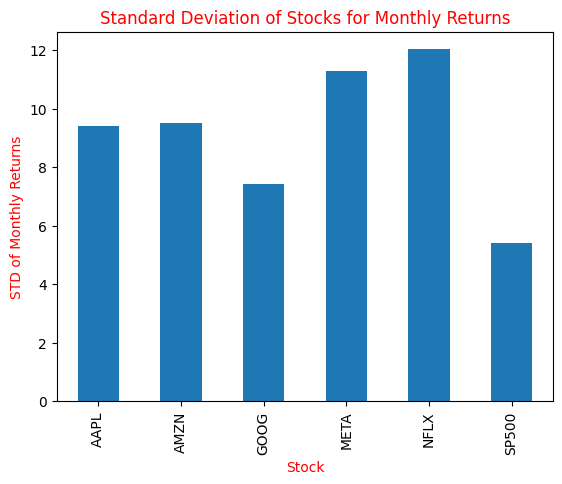

In [412]:
monthly_returns.std().plot(kind='bar')
plt.title('Standard Deviation of Stocks for Monthly Returns',color='red')
plt.xlabel('Stock',color='red')
plt.ylabel('STD of Monthly Returns',color='red');

### Annual Returns

In [413]:
annual_returns = (stocks['Close'].resample('Y').last().pct_change(1).dropna())*100
annual_returns

,AAPL,AMZN,GOOG,META,NFLX,SP500
Date,,,,,,
2019-12-31,86.160761,23.027750,29.104585,56.571825,20.888442,28.878070
2020-12-31,80.745793,76.256061,31.028712,33.086482,67.113752,16.258923
2021-12-31,33.823200,2.376777,65.170561,23.132963,11.412354,26.892739
2022-12-31,-26.828863,-49.615215,-38.671339,-64.221795,-51.052386,-19.442827


### Average Annual Return

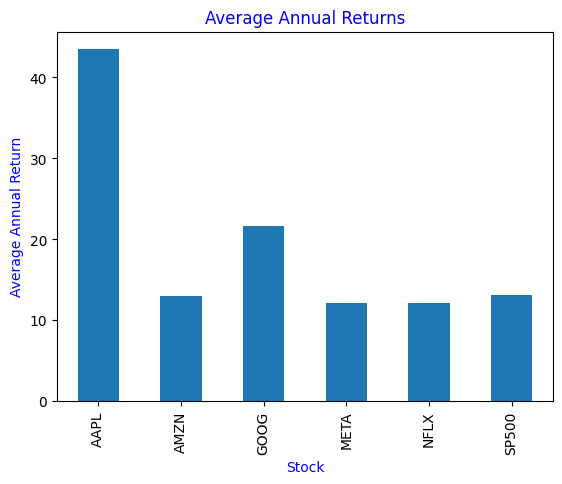

In [414]:
annual_returns.mean().plot(kind='bar')
plt.title('Average Annual Returns',color='blue')
plt.xlabel('Stock',color='blue')
plt.ylabel('Average Annual Return',color='blue');

### Standard Deviation of Annual Returns

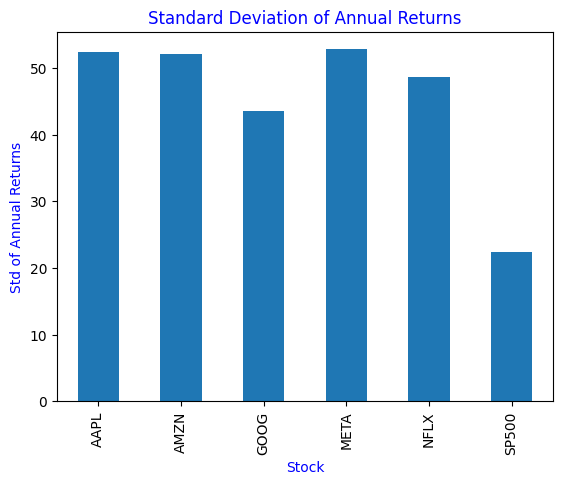

In [415]:
annual_returns.std().plot(kind='bar')
plt.title('Standard Deviation of Annual Returns',color='b')
plt.xlabel('Stock',color='b')
plt.ylabel('Std of Annual Returns',color='b');

This could mean that while the stock has had good years with returns exceeding the average, it's also had years where the returns were much lower, or even negative. High standard deviation implies high volatility, which can mean higher risk, but also the potential for higher returns.

investing in these stocks have provided high returns, but that these returns have been quite volatile (with a standard deviation of 40%-50%). This could be appealing to risk-tolerant investors looking for high potential returns, but might be off-putting to risk-averse investors who prefer more consistent returns.

## Returns and Risks

In [416]:
# Average and Standard Deviation of Daily Returns based on Closing Prices
daily_pct_change.describe().T.loc[:,['mean','std']]

,mean,std
AAPL,0.110079,2.109987
AMZN,0.052908,2.255364
GOOG,0.060107,1.975118
META,0.005642,2.723280
NFLX,0.077276,3.006715
SP500,0.037650,1.377578


In [417]:
# Average and Standard Deviation of Annual Returns based on Closing Prices
annual_returns_summary = annual_returns.describe().T.loc[:,['mean','std']]
annual_returns_summary

,mean,std
AAPL,43.475223,52.430833
AMZN,13.011343,52.074954
GOOG,21.658130,43.498023
META,12.142369,52.804391
NFLX,12.090541,48.622512
SP500,13.146726,22.421662


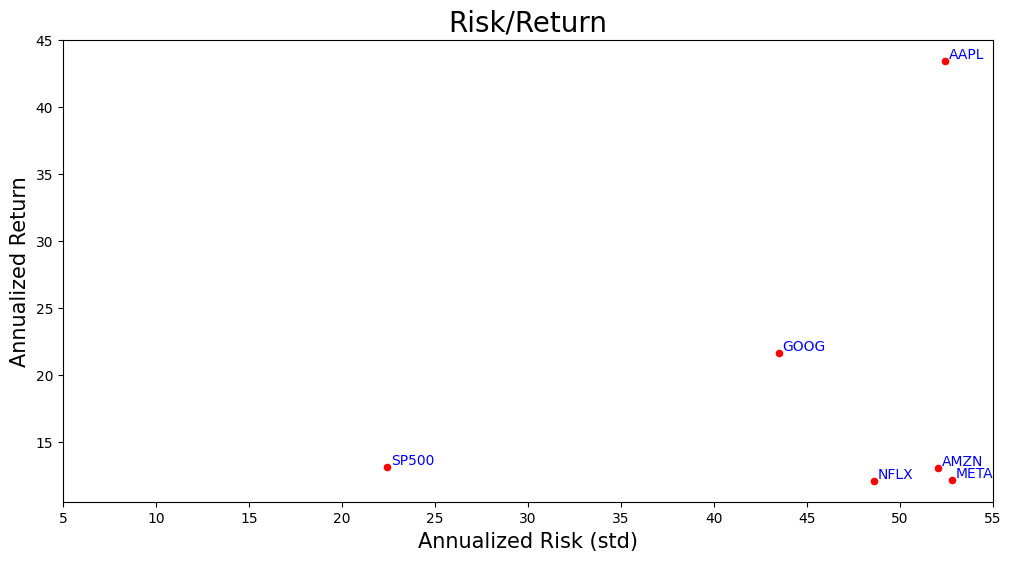

In [418]:
annual_returns_summary.plot(kind='scatter',x='std',y='mean',figsize=(12,6),color='red')
for i in annual_returns_summary.index:
    plt.annotate(i,xy=(annual_returns_summary.loc[i,'std']+.2,annual_returns_summary.loc[i,'mean']+.2),size=10,color='b')
plt.xticks(np.arange(5,60,5))
plt.xlabel('Annualized Risk (std)',fontsize=15)
plt.ylabel('Annualized Return',fontsize=15)
plt.title('Risk/Return',fontsize=20);

Apple returns are very high but also comes with a risk. NFLX,AMZN and META has very high risk and provided low returns. Dividends are not taken into account. The numbers could be different if dividends are taken into account. To compare them on equal footing, risk-adjusted returns should also be calculated.

## Stocks Correlation Matrix

In [419]:
daily_returns_coor = daily_pct_change.corr()
daily_returns_coor

,AAPL,AMZN,GOOG,META,NFLX,SP500
AAPL,1.000000,0.651950,0.699713,0.584404,0.483465,0.801470
AMZN,0.651950,1.000000,0.686097,0.610645,0.613882,0.670899
GOOG,0.699713,0.686097,1.000000,0.674857,0.520596,0.794474
META,0.584404,0.610645,0.674857,1.000000,0.525794,0.633054
NFLX,0.483465,0.613882,0.520596,0.525794,1.000000,0.512532
SP500,0.801470,0.670899,0.794474,0.633054,0.512532,1.000000


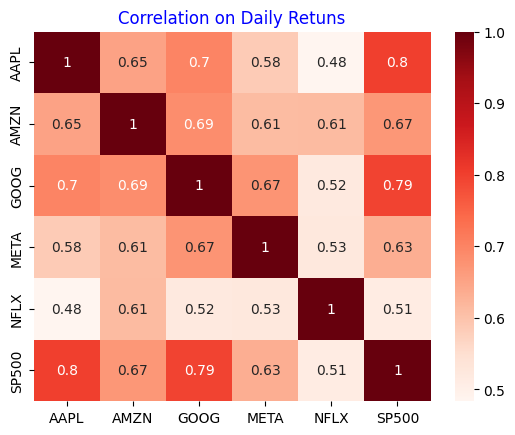

In [420]:
sns.heatmap(data=daily_returns_coor,annot=True,cmap='Reds')
plt.title('Correlation on Daily Retuns',color='b');

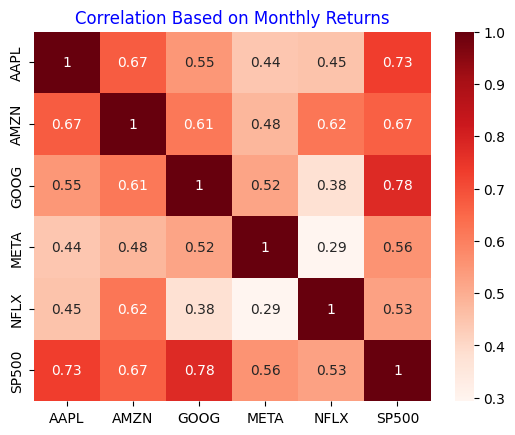

In [421]:
sns.heatmap(data=monthly_returns.corr(),annot=True,cmap='Reds')
plt.title('Correlation Based on Monthly Returns',color='b');

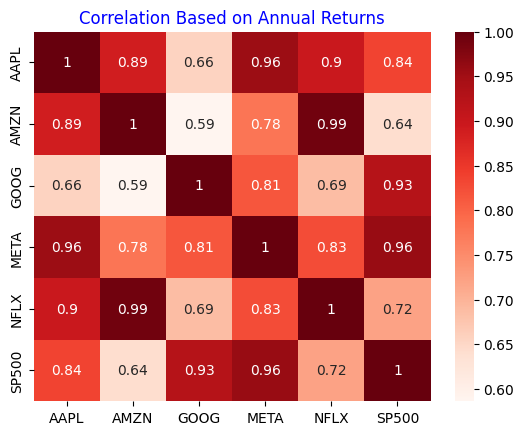

In [422]:
sns.heatmap(data=annual_returns.corr(),annot=True,cmap='Reds')
plt.title('Correlation Based on Annual Returns',color='b');

Apple and Google are most correlated with S&P 500 considering the movement on day to day basis. Netflix is least correlated to S&P 500 and also other stocks.

Coorelation Based on Daily Returns: 

This gives more granular view of how the stocks move together on a day-to-day basis. If two stocks have a high positive correlation based on daily returns, it means that they typically move in the same direction from one day to the next. If the correlation is negative, they typically move in opposite directions. If the correlation is close to zero, there's no clear relationship in the day-to-day movements.

Correlation Based on Monthly Returns:

Calculating correlation based on monthly returns, on the other hand, provides a broader view of how the stocks move together over longer periods. This might smooth out some of the daily noise and provide a clearer picture of the longer-term relationship between the stocks.

## Rolling Statistics

In [423]:
# Simple Moving Average (SMA) for S&P 500
sp500_close = pd.DataFrame(stocks['Close']['SP500'])
sp500_close.rename(columns={'SP500':'Close'},inplace=True)
sp500_close['30 Day SMA'] = sp500_close.rolling(window=30).mean()

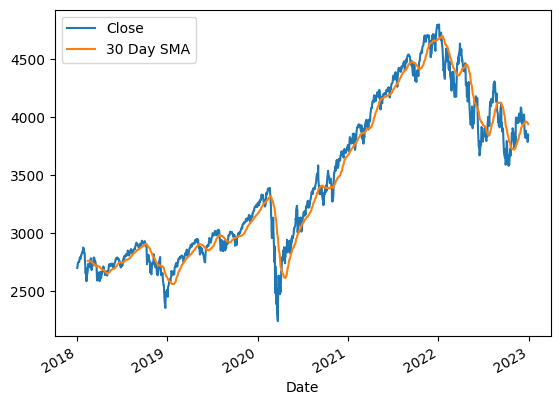

In [424]:
sp500_close.plot();

<Axes: xlabel='Date'>

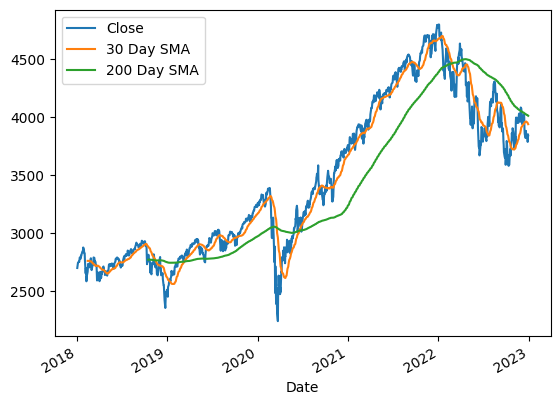

In [425]:
sp500_close['200 Day SMA'] = sp500_close['Close'].rolling(window=200).mean()
sp500_close.plot()

A situation where the 30-day simple moving average (SMA) falls below the 200-day SMA is often referred to as a "Death Cross". This is a technical analysis signal that the shorter-term trend of the stock is moving downward relative to the longer-term trend, and it can be interpreted as a bearish (negative) market signal. 5 times this happened for a period of few months to year.

The 200-day SMA is often seen as a proxy for the long term trend of the stock. So if the 30-day SMA, which represents the more immediate trend, crosses below it, it could be a sign that the stock's price is declining over the longer term.

Based on above graph, we would want to invest around Mid-2020 to end of 2021 and divest it for whole year or may be short sell it.

In [426]:
# Analyzing S&P 500 Monthly Rolling Returns and Risk
df = monthly_returns['SP500'].to_frame()
df.rename(columns={'SP500':'Monthly_Return'},inplace=True)
df

,Monthly_Return
Date,
2018-02-28,-3.894737
2018-03-30,-2.688450
2018-04-30,0.271877
2018-05-31,2.160834
2018-06-29,0.484244
2018-07-31,3.602156
2018-08-31,3.026321
2018-09-28,0.429429
2018-10-31,-6.940336


In [427]:
df['Rolling_Return'] = df['Monthly_Return'].rolling(window=12).mean()  # Rolling 12 Month Return
df['Risk'] = df['Monthly_Return'].rolling(12).std()  # Rolling 12 Month Std

In [429]:
df = df.dropna()
df

,Monthly_Return,Rolling_Return,Risk
Date,,,
2019-01-31,7.868440,-0.255998,4.732928
2019-02-28,2.972889,0.316304,4.667699
2019-03-29,1.792426,0.689711,4.583952
2019-04-30,3.931350,0.994667,4.674461
2019-05-31,-6.577773,0.266449,5.134329
2019-06-28,6.893016,0.800514,5.480677
2019-07-31,1.312815,0.609735,5.413724
2019-08-30,-1.809163,0.206778,5.397434
2019-09-30,1.718118,0.314169,5.415058


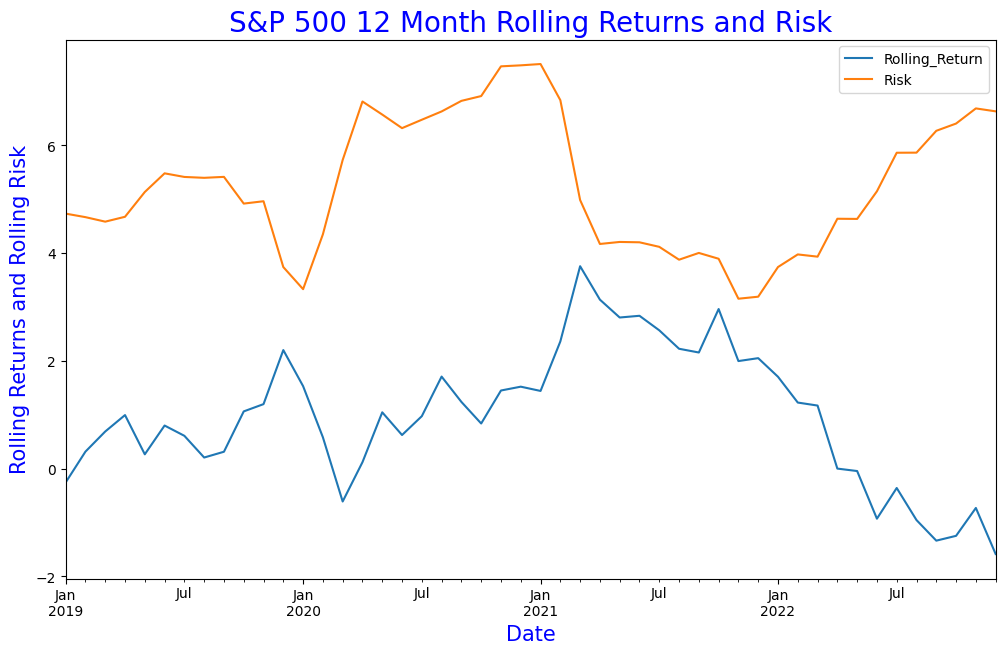

In [434]:
df[['Rolling_Return','Risk']].plot(figsize=(12,7))
plt.title('S&P 500 12 Month Rolling Returns and Risk',color='b',fontsize=20)
plt.xlabel('Date',color='b',fontsize=15)
plt.ylabel('Rolling Returns and Rolling Risk',color='b',fontsize=15);

There was period of high risk or increasing volatility in markets from end of 2022 to end of 2023 and during that period returns showed a decreasing trend. Overall, it seems that lower returns are associated with period in increased volatility or risk and so risk and return are negatively correlated.

In [436]:
df[['Rolling_Return','Risk']].corr()

,Rolling_Return,Risk
Rolling_Return,1.000000,-0.400955
Risk,-0.400955,1.000000


The correlation between risk and return is -0.4

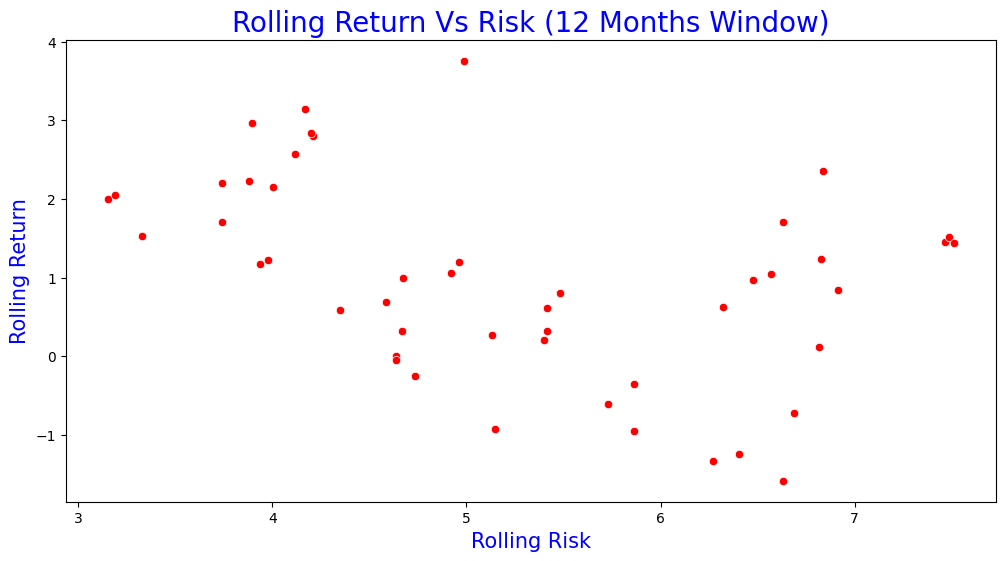

In [443]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df,x='Risk',y='Rolling_Return',color='r')
plt.title('Rolling Return Vs Risk (12 Months Window)',color='b',fontsize=20)
plt.xlabel('Rolling Risk',color='b',fontsize=15)
plt.ylabel('Rolling Return',color='b',fontsize=15);

## Analyzing Effect of Performance and Investment Periods/Time Diversification

In this analysis, I would like to compare average returns over different windows from 1 year to 20 years and discover weather there is a time diversification effect and visualize the investment returns over longer term.

In [445]:
sp500 = yf.download('^GSPC',start='1970-01-01',end='2022-12-31',progress=False)
sp500

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1970-01-02,0.000000,93.540001,91.790001,93.000000,93.000000,8050000
1970-01-05,0.000000,94.250000,92.529999,93.459999,93.459999,11490000
1970-01-06,0.000000,93.809998,92.129997,92.820000,92.820000,11460000
1970-01-07,0.000000,93.379997,91.930000,92.629997,92.629997,10010000
1970-01-08,0.000000,93.470001,91.989998,92.680000,92.680000,10670000
...,...,...,...,...,...,...
2022-12-23,3815.110107,3845.800049,3797.010010,3844.820068,3844.820068,2819280000
2022-12-27,3843.340088,3846.649902,3813.219971,3829.250000,3829.250000,3030300000
2022-12-28,3829.560059,3848.320068,3780.780029,3783.219971,3783.219971,3083520000


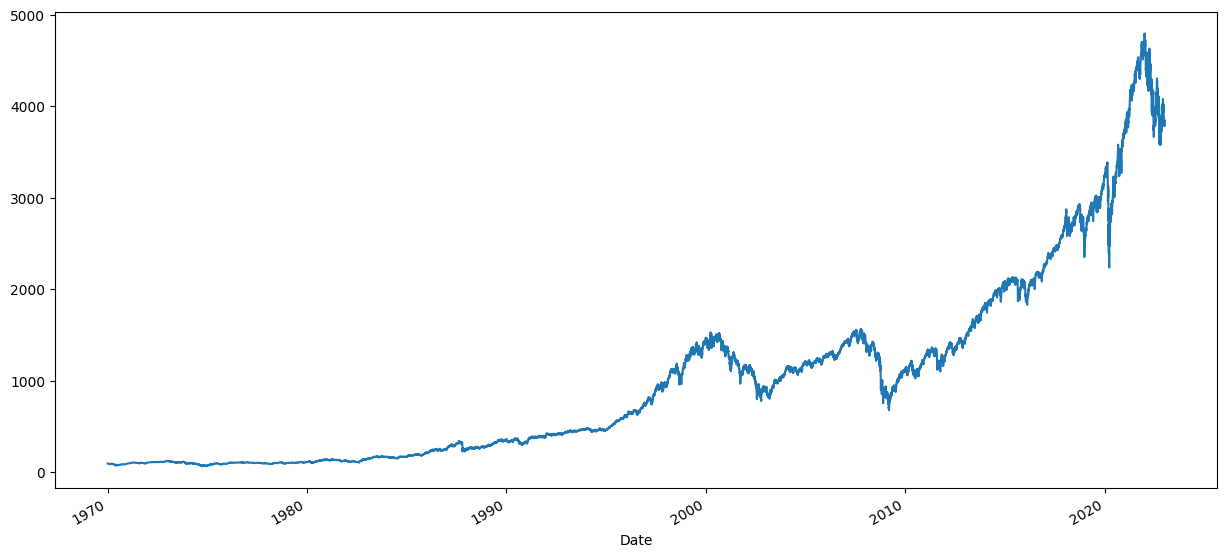

In [452]:
sp500['Close'].plot(figsize=(15,7));

In [467]:
# S&P 500 Monthly Returns
sp_monthly_returns = (sp500['Close'].resample('M').last().pct_change().to_frame().dropna())*100
sp_monthly_returns

,Close
Date,
1970-02-28,5.269353
1970-03-31,0.145248
1970-04-30,-9.048311
1970-05-31,-6.096656
1970-06-30,-5.003268
...,...
2022-08-31,-4.244013
2022-09-30,-9.339567
2022-10-31,7.986341


In [478]:
# Average Annualized Monthly Returns and Risk
windows = [12,36,60,120,240]
for i in windows:
    sp_monthly_returns[f'{int(i/12)} Year Rolling Return'] = sp_monthly_returns['Close'].rolling(window=i).mean()*12
    sp_monthly_returns[f'{int(i/12)} Year Rolling Risk'] = sp_monthly_returns['Close'].rolling(window=i).std()*12
    
sp_monthly_returns

,Close,1 Year Rolling Return,1 Year Rolling Risk,3 Year Rolling Return,3 Year Rolling Risk,5 Year Rolling Return,5 Year Rolling Risk,10 Year Rolling Return,10 Year Rolling Risk,20 Year Rolling Return,20 Year Rolling Risk
Date,,,,,,,,,,,
1970-02-28,5.269353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-03-31,0.145248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-04-30,-9.048311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-05-31,-6.096656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-06-30,-5.003268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,-4.244013,-11.446576,70.376317,11.921249,67.182107,10.953148,60.548594,11.362004,48.562829,8.448448,51.424325
2022-09-30,-9.339567,-16.029227,75.240484,8.235354,70.260851,8.699175,62.569793,10.185686,49.823218,8.531591,51.211942
2022-10-31,7.986341,-14.957269,76.853540,10.216409,71.723283,9.852681,63.536378,11.182214,50.332123,8.498664,51.152979


<Axes: xlabel='Date'>

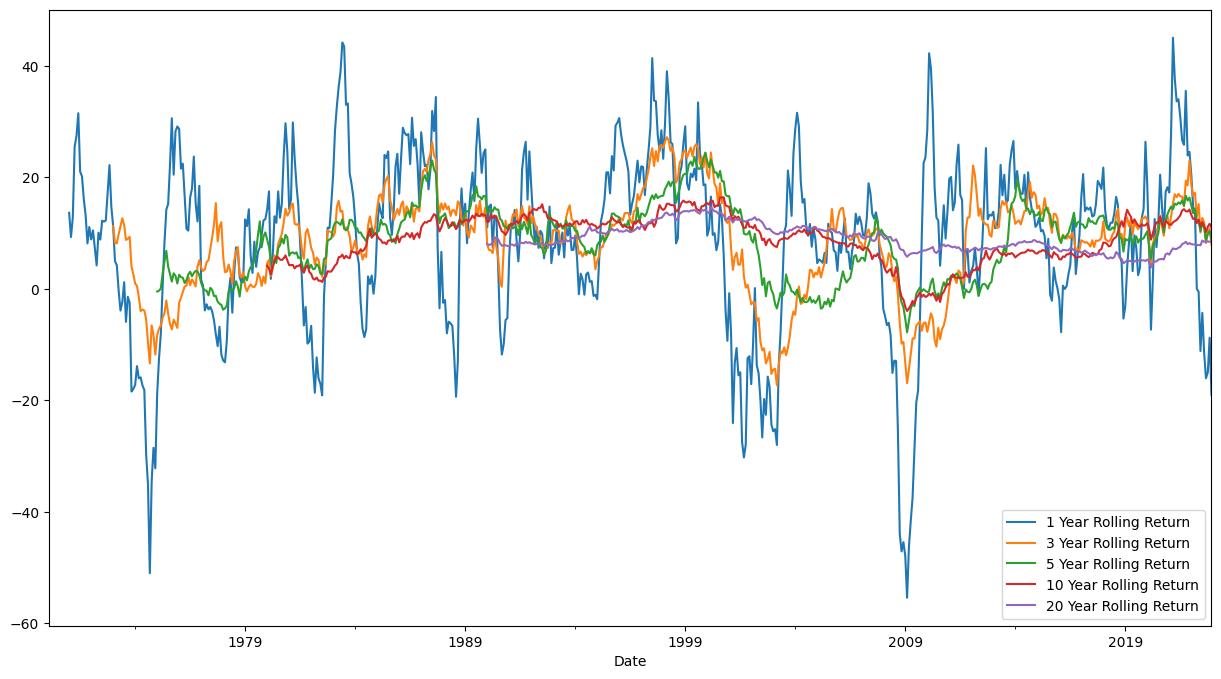

In [476]:
column = []
for col in sp_monthly_returns.columns:
    if 'Return' in col:
        column.append(col)
sp_monthly_returns[column].plot(figsize=(15,8))

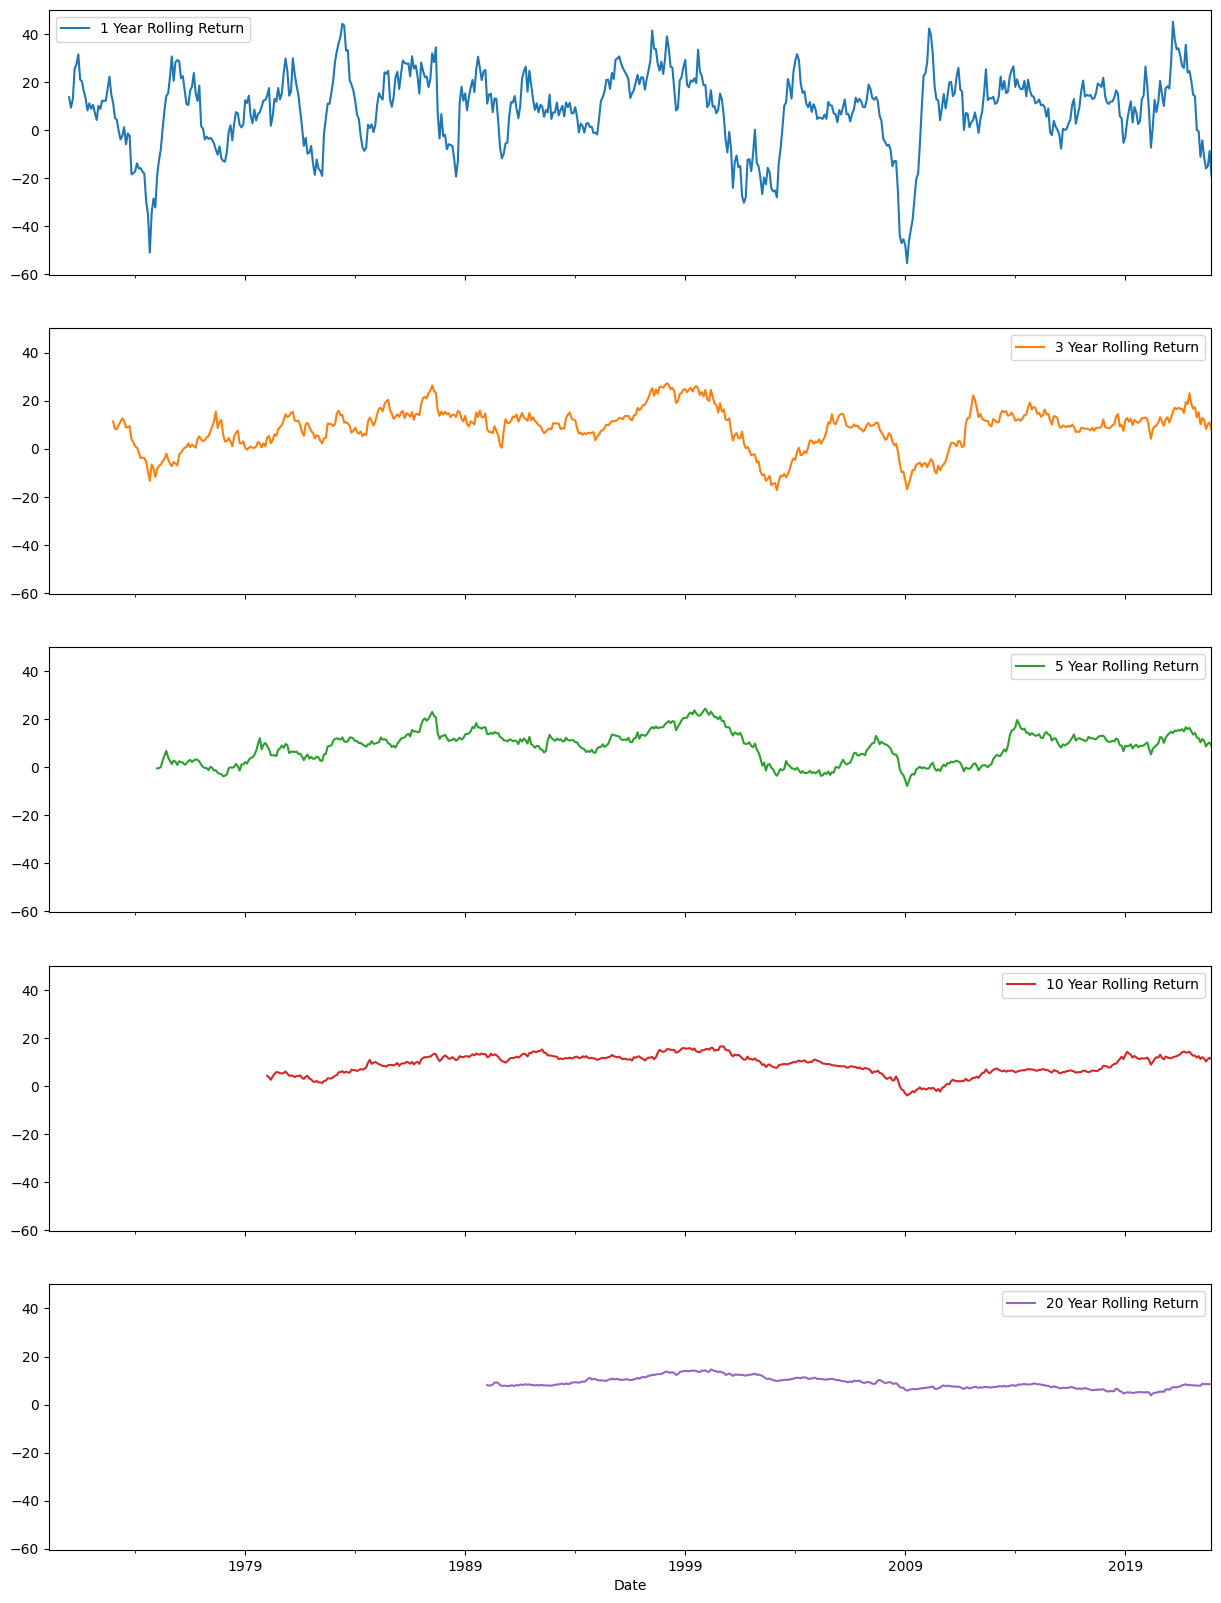

In [516]:
sp_monthly_returns[column].plot(figsize=(15,20),subplots=True,sharey=True);

The 1 year investment period can have huge swings and can suffer huge losses or huges gain but with great risk. The higher the investment period is, the less the volatility is and less likely it is to suffer the losses. So there is Time Diversification effect. Investing in SP500 can be a risky investment where timing and market environment can be a key to success and also there is a time diversification effect, so the longer the investment period, the less volatile the overall performance as periods with poorer returns can be recovered by strong periods with positive returns.

In [520]:
sp_monthly_returns

,Close,1 Year Rolling Return,1 Year Rolling Risk,3 Year Rolling Return,3 Year Rolling Risk,5 Year Rolling Return,5 Year Rolling Risk,10 Year Rolling Return,10 Year Rolling Risk,20 Year Rolling Return,20 Year Rolling Risk
Date,,,,,,,,,,,
1970-02-28,5.269353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-03-31,0.145248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-04-30,-9.048311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-05-31,-6.096656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-06-30,-5.003268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,-4.244013,-11.446576,70.376317,11.921249,67.182107,10.953148,60.548594,11.362004,48.562829,8.448448,51.424325
2022-09-30,-9.339567,-16.029227,75.240484,8.235354,70.260851,8.699175,62.569793,10.185686,49.823218,8.531591,51.211942
2022-10-31,7.986341,-14.957269,76.853540,10.216409,71.723283,9.852681,63.536378,11.182214,50.332123,8.498664,51.152979


# The S&P 500 Return Triangle

In [565]:
# Getting Last 30 Years of Data for S&P 500
annual_sp = sp500['Close'].resample('A',kind='period').last().to_frame().iloc[-31:]
annual_sp

,Close
Date,
1992,435.709991
1993,466.450012
1994,459.269989
1995,615.929993
1996,740.739990
1997,970.429993
1998,1229.229980
1999,1469.250000
2000,1320.280029


In [566]:
# Calculate Annual Log Returns for the Last 30 Years
annual_sp['Returns'] = np.log(annual_sp['Close']/annual_sp['Close'].shift())
annual_sp

,Close,Returns
Date,,
1992,435.709991,NaN
1993,466.450012,0.068174
1994,459.269989,-0.015513
1995,615.929993,0.293495
1996,740.739990,0.184516
1997,970.429993,0.270090
1998,1229.229980,0.236404
1999,1469.250000,0.178364
2000,1320.280029,-0.106908


In [567]:
annual_sp.dropna(inplace=True)
annual_sp

,Close,Returns
Date,,
1993,466.450012,0.068174
1994,459.269989,-0.015513
1995,615.929993,0.293495
1996,740.739990,0.184516
1997,970.429993,0.270090
1998,1229.229980,0.236404
1999,1469.250000,0.178364
2000,1320.280029,-0.106908
2001,1148.079956,-0.139753


In [572]:
# Adding Columns for Rolling Returns Mean
windows = [i for i in range(30,0,-1)]
for year in windows:
    annual_sp[f'{year}Y'] = annual_sp['Returns'].rolling(window=year).mean()
annual_sp

,Close,Returns,30Y,29Y,28Y,27Y,26Y,25Y,24Y,23Y,...,10Y,9Y,8Y,7Y,6Y,5Y,4Y,3Y,2Y,1Y
Date,,,,,,,,,,,,,,,,,,,,,
1993,466.450012,0.068174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.068174
1994,459.269989,-0.015513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.026331,-0.015513
1995,615.929993,0.293495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.115385,0.138991,0.293495
1996,740.739990,0.184516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.132668,0.154166,0.239006,0.184516
1997,970.429993,0.270090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.160152,0.183147,0.249367,0.227303,0.270090
1998,1229.229980,0.236404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.172861,0.193798,0.246126,0.230337,0.253247,0.236404
1999,1469.250000,0.178364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.173647,0.191226,0.232574,0.217344,0.228286,0.207384,0.178364
2000,1320.280029,-0.106908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.138578,0.148635,0.175993,0.152493,0.144487,0.102620,0.035728,-0.106908
2001,1148.079956,-0.139753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.107652,0.112587,0.130887,0.103785,0.087639,0.042027,-0.022766,-0.123331,-0.139753


In [574]:
sp_triangle = annual_sp.drop(['Close','Returns'],axis=1)

In [575]:
sp_triangle

,30Y,29Y,28Y,27Y,26Y,25Y,24Y,23Y,22Y,21Y,...,10Y,9Y,8Y,7Y,6Y,5Y,4Y,3Y,2Y,1Y
Date,,,,,,,,,,,,,,,,,,,,,
1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.068174
1994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.026331,-0.015513
1995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.115385,0.138991,0.293495
1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.132668,0.154166,0.239006,0.184516
1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.160152,0.183147,0.249367,0.227303,0.270090
1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.172861,0.193798,0.246126,0.230337,0.253247,0.236404
1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.173647,0.191226,0.232574,0.217344,0.228286,0.207384,0.178364
2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.138578,0.148635,0.175993,0.152493,0.144487,0.102620,0.035728,-0.106908
2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.107652,0.112587,0.130887,0.103785,0.087639,0.042027,-0.022766,-0.123331,-0.139753


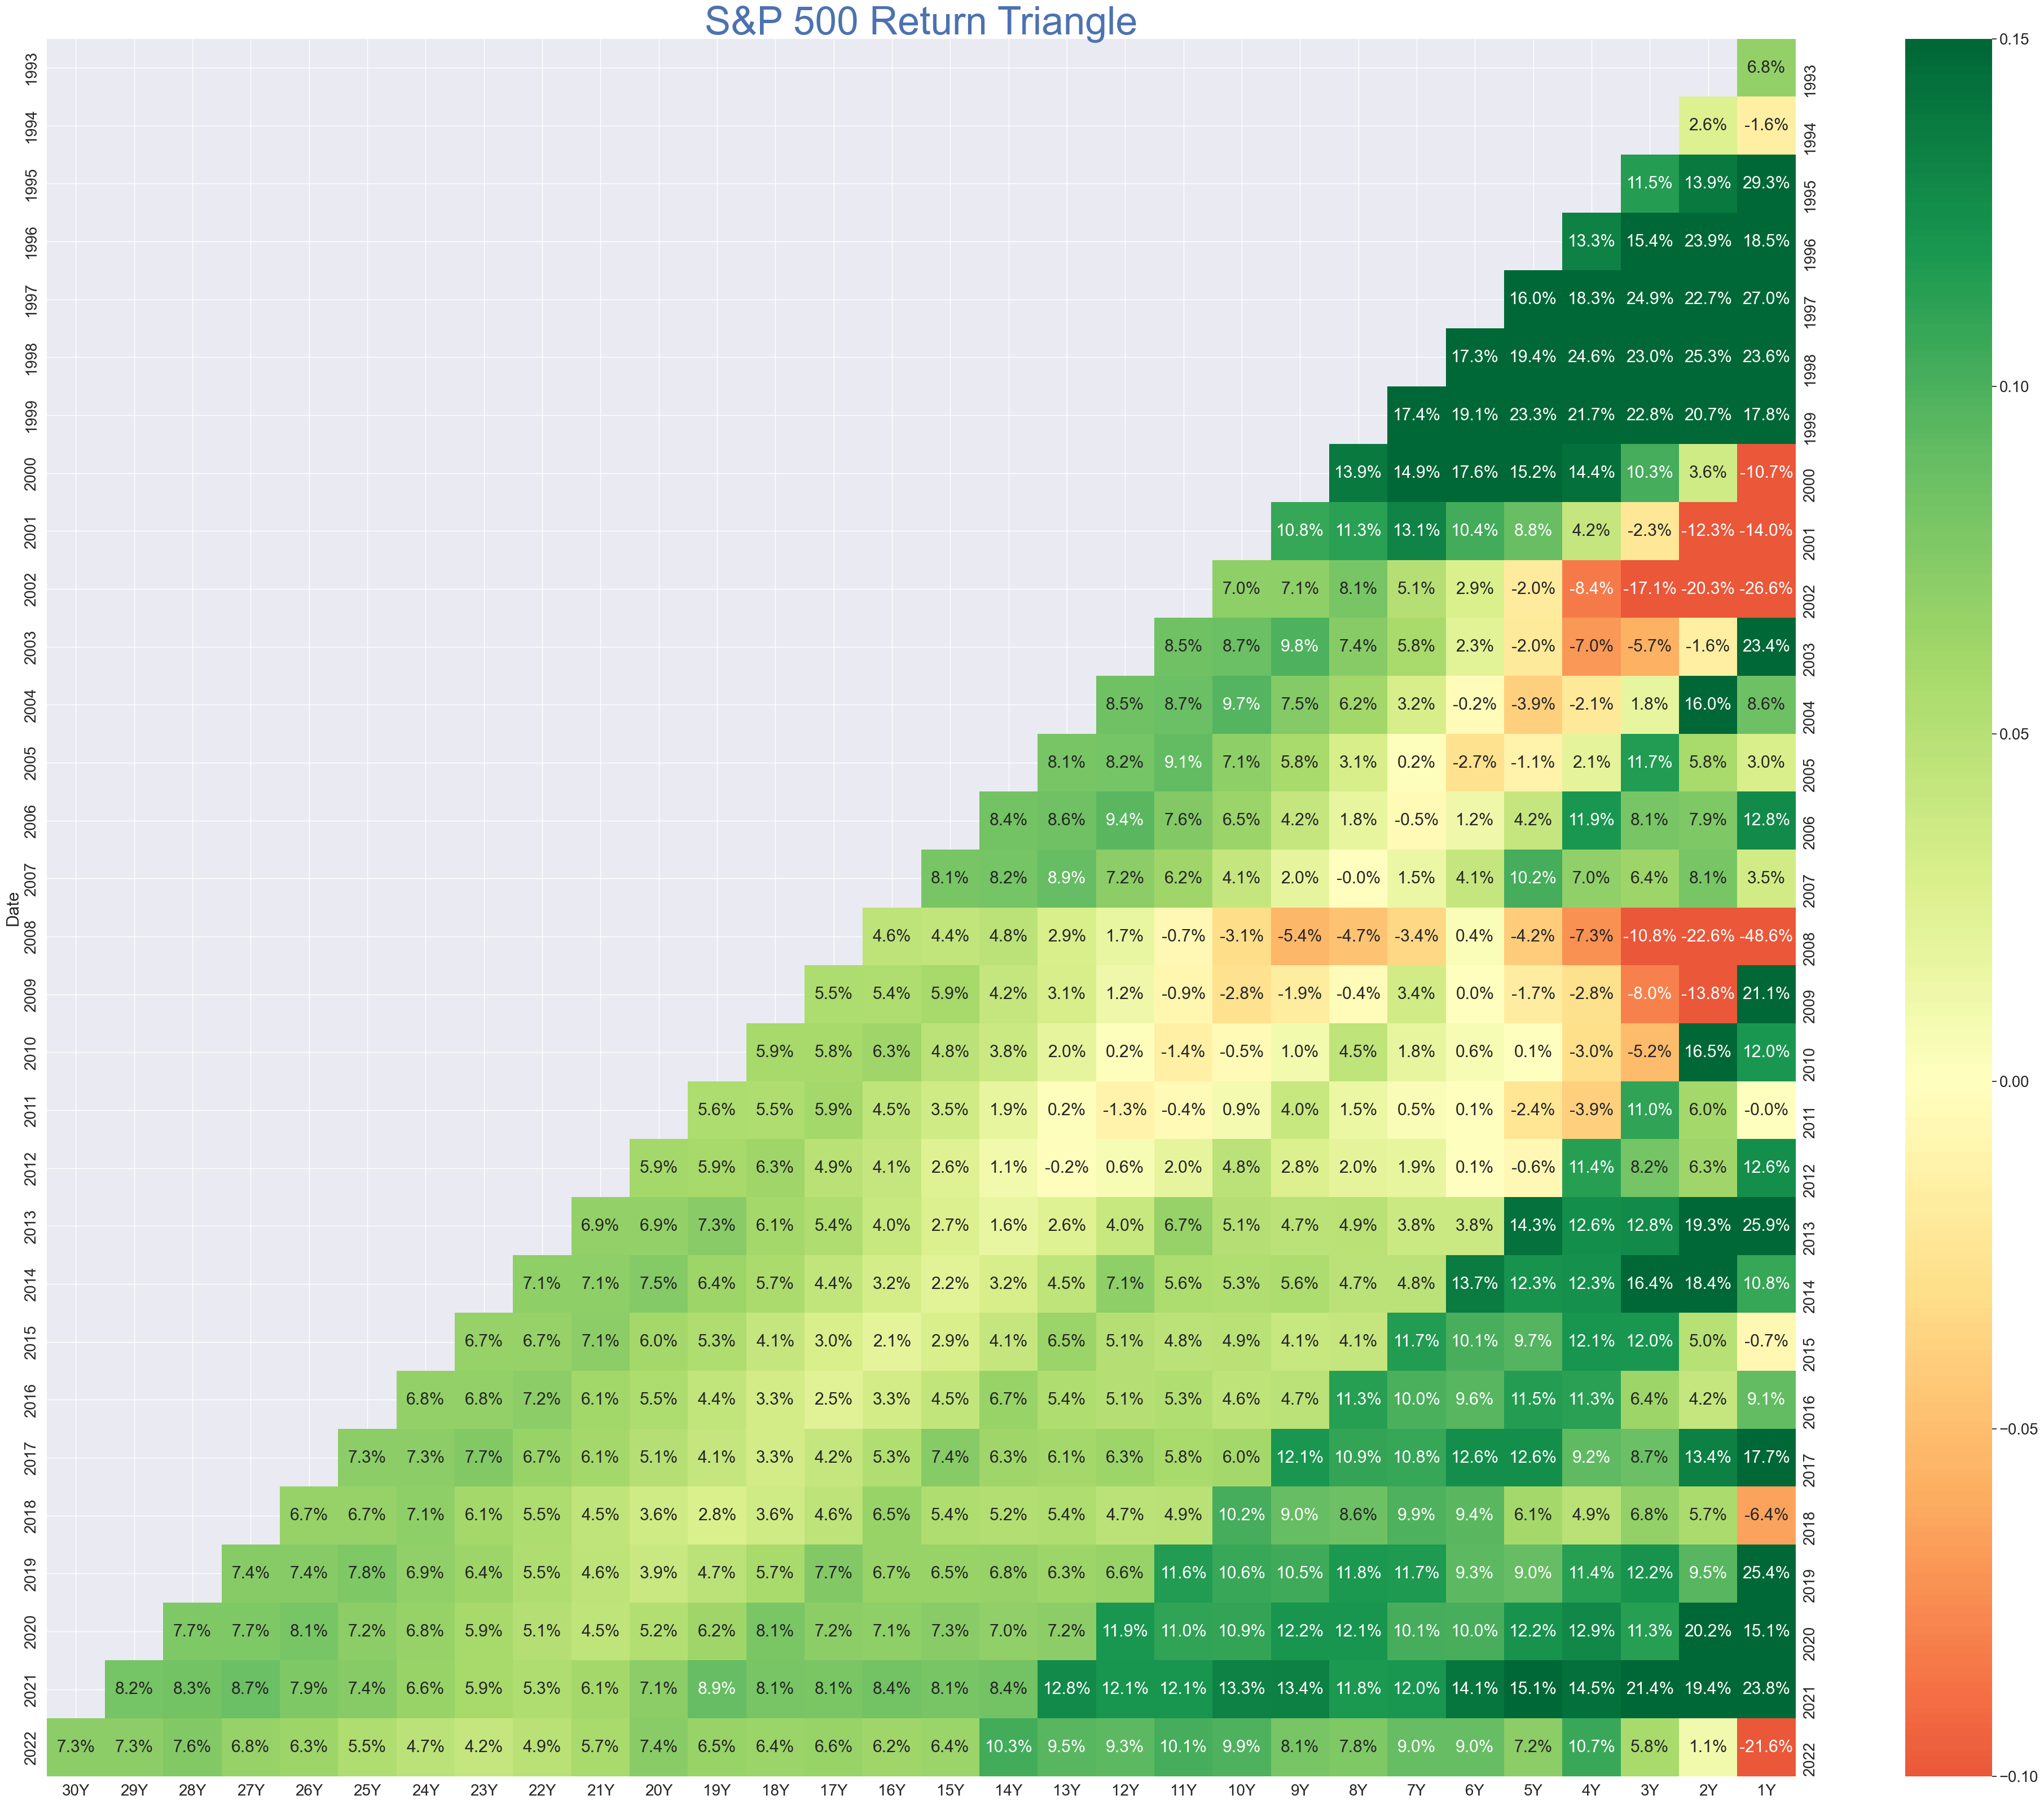

In [586]:
plt.figure(figsize=(50,40))
sns.set(font_scale=1.8)
sns.heatmap(data=sp_triangle,annot=True,fmt='.1%',cmap='RdYlGn',vmin=-.1,vmax=.15,center=0)
plt.title('S&P 500 Return Triangle',color='b',fontsize=50)
plt.xticks(fontsize=20)
plt.tick_params(axis='y',labelright=True);